In [ ]:
/content/drive/MyDrive/deeplearning/kamp/impix/01/data/df001-v1.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# /content/drive/MyDrive/deeplearning/kamp/impix/01/data/df001-v1.csv
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/df001-v1.csv') #, encoding = 'cp949')


In [ ]:
df

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone
0,75.6648,30.0155,100.000486,100.01548
1,75.6706,32.2732,100.000486,100.01548
2,75.6776,32.1592,98.853300,99.14600
3,75.8656,30.8312,98.791800,99.17675
4,73.6468,29.5274,98.791800,99.20750
...,...,...,...,...
345385,67.5951,24.5822,100.555000,99.31990
345386,69.7477,24.6776,100.681000,99.32550
345387,69.6538,24.5689,100.681000,99.32550
345388,69.6970,24.6643,100.681000,99.32550


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 로드 (예시: CSV 파일)
# data = pd.read_csv("your_data.csv")
data = df.copy()

# 특징 선택 (필요한 열만 선택)
# features = data[['feature1', 'feature2', ...]]
features = df.iloc[:, :1]

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 표준화된 데이터를 데이터프레임으로 변환
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns, index=features.index)

# IQR 기반 이상치 제거 함수
def detect_outliers_iqr(data, column):
    """
    IQR 방식을 사용하여 이상치를 탐지하는 함수
    :param data: 데이터프레임
    :param column: 이상치 탐지 대상 컬럼명
    :return: 이상치의 인덱스 리스트
    """
    Q1 = data[column].quantile(0.25)  # 1사분위수
    Q3 = data[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR  # 하한선
    upper_bound = Q3 + 1.5 * IQR  # 상한선
    # 이상치 인덱스 반환
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)].index

# 각 컬럼별로 IQR 방식으로 이상치 탐지
outlier_indices = []
for col in scaled_features_df.columns:
    outlier_indices.extend(detect_outliers_iqr(scaled_features_df, col))

# 중복된 이상치 인덱스 제거
outlier_indices = list(set(outlier_indices))

# 이상치 데이터 출력
outliers = data.iloc[outlier_indices]
print("Outliers:", outliers)


Outliers:         건조 1존 OP  건조 2존 OP  건조로 온도 1 Zone  건조로 온도 2 Zone
32768    64.5710  25.99060        100.341        99.2852
303489   66.6971  20.84045        100.782       100.3540
32772    65.6612  26.53840        100.399        99.2180
32773    65.9470  26.44310        100.399        99.2180
32774    66.0677  24.03020        100.402        99.2852
...          ...       ...            ...            ...
32763    65.4606  25.22310        100.341        99.2236
32764    65.6858  25.26990        100.288        99.2310
32765    66.0050  25.31210        100.350        99.2310
32766    66.1625  25.35040        100.288        99.2310
32767    66.6214  23.50550        100.279        99.2852

[13147 rows x 4 columns]


In [ ]:
df_iqr = outliers

In [ ]:
df_iqr

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone
32768,64.5710,25.99060,100.341,99.2852
303489,66.6971,20.84045,100.782,100.3540
32772,65.6612,26.53840,100.399,99.2180
32773,65.9470,26.44310,100.399,99.2180
32774,66.0677,24.03020,100.402,99.2852
...,...,...,...,...
32763,65.4606,25.22310,100.341,99.2236
32764,65.6858,25.26990,100.288,99.2310
32765,66.0050,25.31210,100.350,99.2310
32766,66.1625,25.35040,100.288,99.2310


In [ ]:
df_iqr = pd.DataFrame(data.iloc[outliers])

IndexError: DataFrame indexer is not allowed for .iloc
Consider using .loc for automatic alignment.

In [ ]:
df_iqr_remain = df[~df.index.isin(df_iqr.index)]

In [ ]:
import os

# 생성할 디렉토리 경로
path = "/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr"

# 디렉토리 생성
os.makedirs(path, exist_ok=True)

# df_iqr.to_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_iqr-v1.csv', index=False)

In [ ]:

df_iqr.to_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_iqr-v1.csv', index=False)

In [ ]:

df.to_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_001-v1.csv', index=False)

In [ ]:

df_iqr_remain.to_csv('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/df_iqr_remain-v1.csv', index=False)

In [ ]:
normal = df_iqr_remain.copy()
abnormal = df_iqr.copy()

In [ ]:
normal['설비 이상신호'] = 0

abnormal['설비 이상신호'] = 1

In [ ]:
normal

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,설비 이상신호
0,75.6648,30.0155,100.000486,100.01548,0
1,75.6706,32.2732,100.000486,100.01548,0
2,75.6776,32.1592,98.853300,99.14600,0
3,75.8656,30.8312,98.791800,99.17675,0
4,73.6468,29.5274,98.791800,99.20750,0
...,...,...,...,...,...
345385,67.5951,24.5822,100.555000,99.31990,0
345386,69.7477,24.6776,100.681000,99.32550,0
345387,69.6538,24.5689,100.681000,99.32550,0
345388,69.6970,24.6643,100.681000,99.32550,0


In [ ]:
from sklearn.model_selection import train_test_split
train_Y, test_Y = train_test_split(normal, test_size =0.3, random_state =1)
print('학습 데이터셋 개수:', len(train_Y))
print('테스트 데이터셋 개수:', len(test_Y))

학습 데이터셋 개수: 232570
테스트 데이터셋 개수: 99673


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 스케일링
scaler = MinMaxScaler()
# 정상 학습데이터 스케일링
normal_train_scaled = scaler.fit_transform(train_Y.iloc[:,:-1])
X_normal_train = pd.DataFrame(data=normal_train_scaled, index=train_Y.iloc[:,:-1].index,
                              columns=train_Y.iloc[:,:-1].columns)
# 정상 학습데이터 y 값 설정
y_normal_train = train_Y.iloc[:,-1]
# 최종 정상 학습데이터
train_Y_normal = pd.concat([X_normal_train, y_normal_train], axis=1)
# 정상 테스트데이터 스케일링
normal_test_scaled = scaler.transform(test_Y.iloc[:,:-1])
X_normal_test = pd.DataFrame(data=normal_test_scaled, index=test_Y.iloc[:,:-1].index,
                             columns=test_Y.iloc[:,:-1].columns)
# 정상 테스트데이터 y 값 설정
y_normal_test = test_Y.iloc[:,-1]
# 최종 정상 테스트데이터
test_Y_normal = pd.concat([X_normal_test, y_normal_test], axis=1)
# 비정상 테스트 데이터 스케일링
abnormal_test_scaled = scaler.transform(abnormal.iloc[:, :-1])
X_abnormal_test = pd.DataFrame(data=abnormal_test_scaled,
          index=abnormal.iloc[:, :-1].index,columns=abnormal.iloc[:, :-1].columns)
# y 값 설정
y_abnormal_test = abnormal.iloc[:,-1]
# 최종 비정상 테스트데이터
abnormal_data = pd.concat([X_abnormal_test, y_abnormal_test], axis=1)

In [ ]:
X_normal_train.shape[1]

4

In [ ]:
import tensorflow as tf
tf.random.set_seed(1)
from keras.layers import Dense
from keras.models import Sequential
# [코드 19
# from keras.models import Sequential
# from keras.layers import Dense

# Encoder 모델 정의
model_encoder = Sequential([
    Dense(15, activation="relu", input_shape=(X_normal_train.shape[1],)),  # 입력 크기 명시
    Dense(10, activation="relu"),
    Dense(5, activation="relu")
])

# Decoder 모델 정의
model_decoder = Sequential([
    Dense(10, activation="relu", input_shape=(5,)),  # 입력 크기 명시
    Dense(15, activation="relu"),
    Dense(X_normal_train.shape[1], activation="relu")
])

# Autoencoder 모델 구성
AE_model = Sequential([model_encoder, model_decoder])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
AE_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 5)                   │             290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 4)                   │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 579 (2.26 KB)

 Trainable params: 579 (2.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

AE_model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))


In [ ]:
import os
from tensorflow.keras.callbacks import Callback, EarlyStopping

class SaveModelEveryNEpochs(Callback):
    def __init__(self, save_path, frequency):
        super().__init__()
        self.save_path = save_path
        self.frequency = frequency

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.frequency == 0:  # 20회마다 저장
            save_path_with_epoch = self.save_path.format(epoch=epoch + 1)
            self.model.save(save_path_with_epoch)
            print(f"\nModel saved at {save_path_with_epoch}")

# 모델 저장 경로
model_path_template = r'/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/iqr001_v1-epoch-{epoch:02d}.keras'

# 사용자 정의 콜백 추가
save_model_callback = SaveModelEveryNEpochs(save_path=model_path_template, frequency=20)

# 모델 학습
history = AE_model.fit(
    X_normal_train, X_normal_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=10, mode="min"),
        save_model_callback  # 사용자 정의 콜백 추가
    ]
)

# 최종 모델 저장
AE_model.save('/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/iqr_v1-finish-my_model.keras')


Epoch 1/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.1665 - val_loss: 0.0020
Epoch 2/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 3/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 7/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 8/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 11/100
5815/5815 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 12

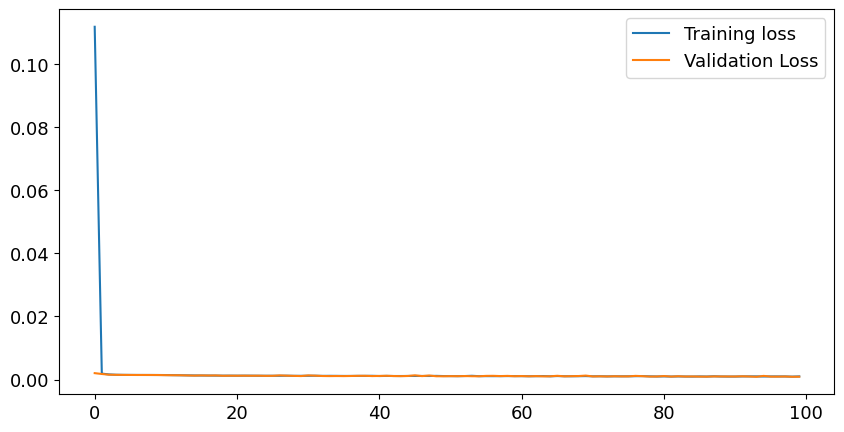

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] =13
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
AE_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 5)                   │             290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 4)                   │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,739 (6.80 KB)

 Trainable params: 579 (2.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,160 (4.54 KB)

In [ ]:
x_train_pred = AE_model.predict(X_normal_train)
train_mae_loss = np.mean(np.abs(x_train_pred - X_normal_train), axis=1)




7268/7268 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


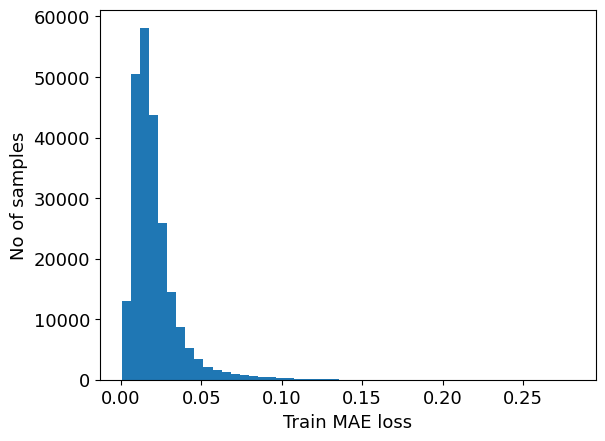

Reconstruction threshold:  0.2812829720576152


In [ ]:
import matplotlib.pyplot as plt
plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()
threshold = np.max(train_mae_loss)
print("Reconstruction threshold: ", threshold)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt
# 정상 테스트 데이터에 대한 재구성 오차 계산
x_test_normal_pred = AE_model.predict(X_normal_test)
test_normal_mae_loss = np.mean(np.abs(x_test_normal_pred - X_normal_test), axis=1)


# 비정상 테스트 데이터에 대한 재구성 오차 계산
x_test_abnormal_pred = AE_model.predict(X_abnormal_test)
test_abnormal_mae_loss = np.mean(np.abs(x_test_abnormal_pred - X_abnormal_test), axis=1)

# 정상/비정상 데이터 라벨링
y_test_normal = np.zeros(len(test_normal_mae_loss))  # 정상 데이터는 0으로 라벨링
y_test_abnormal = np.ones(len(test_abnormal_mae_loss))  # 비정상 데이터는 1로 라벨링

# 테스트 데이터 재구성 오차 합치기
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([
    (test_normal_mae_loss > threshold).astype(int),  # 정상 데이터에 대한 예측 (Threshold 초과 시 1)
    (test_abnormal_mae_loss > threshold).astype(int)  # 비정상 데이터에 대한 예측
])

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))
# 혼동행렬 계산
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

3115/3115 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Precision (정밀도): 0.9970501474926253
Recall (재현율): 0.025709287289876016
F1 Score: 0.050126056651342135

Classification Report:
              precision    recall  f1-score   support

          정상       0.89      1.00      0.94     99673
         비정상       1.00      0.03      0.05     13147

    accuracy                           0.89    112820
   macro avg       0.94      0.51      0.49    112820
weighted avg       0.90      0.89      0.84    112820

[[99672     1]
 [12809   338]]


결과 해석
주요 메트릭
Precision (정밀도): 0.997 (~99.7%)

모델이 비정상 데이터로 예측한 경우 중, 99.7%가 실제 비정상임을 의미합니다.
정밀도가 높은 것은 오탐(False Positive)이 거의 없음을 나타냅니다.
Recall (재현율): 0.026 (~2.6%)

실제 비정상 데이터 중 단 2.6%만 탐지했음을 의미합니다.
대부분의 비정상 데이터를 놓쳤습니다.
F1 Score: 0.050 (~5.0%)

Precision과 Recall의 조화 평균입니다.
Recall이 낮기 때문에 F1 Score도 낮은 값을 가집니다.
Confusion Matrix
lua
코드 복사
[[99672     1]  # 정상 데이터
 [12809   338]] # 비정상 데이터
정상 데이터:

99672개의 정상 데이터를 올바르게 예측 (True Negative, TN).
단 1개의 정상 데이터를 비정상으로 잘못 예측 (False Positive, FP).
비정상 데이터:

338개의 비정상 데이터를 정확히 탐지 (True Positive, TP).
12809개의 비정상 데이터를 정상으로 잘못 예측 (False Negative, FN).
Classification Report
정상 데이터:

Precision (정밀도): 0.89
정상으로 예측한 데이터 중, 89%가 실제 정상입니다.
Recall (재현율): 1.00
실제 정상 데이터를 100% 탐지했습니다.
F1-Score: 0.94
매우 높은 성능을 보임.
비정상 데이터:

Precision (정밀도): 1.00
비정상으로 예측한 데이터는 거의 모두 실제 비정상입니다.
Recall (재현율): 0.03
비정상 데이터를 거의 탐지하지 못했습니다.
F1-Score: 0.05
비정상 데이터 탐지 성능이 매우 낮음을 보여줍니다.
전체 정확도 (Accuracy): 89%

높은 것처럼 보이지만, 데이터가 불균형하기 때문에 정확도가 모델 성능을 대표하지 못합니다.
정상 데이터가 압도적으로 많아 높은 정확도를 보이는 상황입니다.
평균 점수 (Macro Avg, Weighted Avg):

Macro Avg:
Precision과 Recall을 단순 평균낸 값으로, 데이터 불균형의 영향을 고려하지 않습니다.
Weighted Avg:
각 클래스의 지원(Support, 데이터 수)에 가중치를 두어 평균을 냅니다.
전체 데이터 분포를 더 잘 반영합니다.
문제점
비정상 데이터 탐지 실패 (Recall 문제):

비정상 데이터를 탐지해야 하는 주요 목표를 달성하지 못하고 있습니다.
정상 데이터는 완벽히 탐지했지만, 비정상 데이터를 거의 놓쳤습니다.
데이터 불균형:

정상 데이터(99,673)와 비정상 데이터(13,147)의 비율이 크게 차이 납니다.
모델이 비정상 데이터를 무시하는 경향이 있습니다.
개선 방안
데이터 불균형 해결:

비정상 데이터를 증가시키는 Over-sampling 기법 사용 (e.g., SMOTE).
정상 데이터를 줄이는 Under-sampling 기법 사용.
비용 민감 학습 (Cost-sensitive Learning):

비정상 데이터를 탐지하지 못하는 경우의 비용을 더 높게 설정해, 모델이 비정상 데이터를 더 잘 탐지하도록 유도합니다.
Threshold 조정:

분류 임계값(Threshold)을 낮춰, Recall을 우선적으로 개선.
평가 기준 변경:

Accuracy 대신 Precision-Recall Curve 또는 ROC Curve를 분석하여 비정상 데이터 탐지 성능을 확인.
특성 추가:

비정상 데이터와 상관관계가 높은 새로운 변수를 추가하여 탐지 능력을 높입니다.
다른 모델 사용:

현재 모델이 비정상 탐지에 적합하지 않을 수 있으므로, **앙상블 모델(XGBoost, Random Forest)**이나 Anomaly Detection 모델을 시도합니다.
결론
현재 모델은 정상 데이터 탐지에는 성공적이지만, 비정상 데이터 탐지에는 실패했습니다. 데이터를 불균형 문제를 해결하고, Recall을 향상시키는 방향으로 개선해야 합니다.

autoencoder 종료

In [ ]:
data

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone
0,75.6648,30.0155,100.000486,100.01548
1,75.6706,32.2732,100.000486,100.01548
2,75.6776,32.1592,98.853300,99.14600
3,75.8656,30.8312,98.791800,99.17675
4,73.6468,29.5274,98.791800,99.20750
...,...,...,...,...
345385,67.5951,24.5822,100.555000,99.31990
345386,69.7477,24.6776,100.681000,99.32550
345387,69.6538,24.5689,100.681000,99.32550
345388,69.6970,24.6643,100.681000,99.32550


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import entropy

# 데이터 생성 또는 로드 (예: CSV 파일)
# data = pd.read_csv("your_data.csv")
# data = pd.DataFrame({
#     'feature1': [1, 2, 2, 3, 3, 3, 4, 4, 5, 100],  # 예시 데이터
#     'feature2': [10, 20, 20, 30, 30, 30, 40, 40, 50, 500]
# })

# 엔트로피 계산 함수
def calculate_entropy(data, bins=10):
    """
    데이터의 엔트로피를 계산
    :param data: 1차원 데이터 배열 또는 시리즈
    :param bins: 엔트로피를 계산할 구간 수
    :return: 엔트로피 값
    """
    hist, _ = np.histogram(data, bins=bins, density=True)
    hist = hist[hist > 0]  # 빈도가 0인 경우 제거
    return entropy(hist, base=2)  # base=2는 정보 엔트로피 기준

# 지니계수 계산 함수
def calculate_gini_index(data):
    """
    데이터의 지니계수를 계산
    :param data: 1차원 데이터 배열 또는 시리즈
    :return: 지니계수 값
    """
    probs = np.unique(data, return_counts=True)[1] / len(data)
    return 1 - np.sum(probs**2)

# 이상치 정도(outlierness) 계산
def calculate_outlierness(data):
    """
    데이터의 각 샘플에 대해 엔트로피와 지니계수를 기반으로 이상치 정도를 계산
    :param data: 데이터프레임
    :return: 이상치 정도 점수 (DataFrame)
    """
    outlierness_scores = {}
    for col in data.columns:
        column_data = data[col]
        # 엔트로피와 지니계수 계산
        entropy_score = calculate_entropy(column_data)
        gini_score = calculate_gini_index(column_data)
        # 이상치 정도 계산
        outlierness_scores[col] = {
            'Entropy': entropy_score,
            'Gini Index': gini_score
        }
    return pd.DataFrame(outlierness_scores).T

# 이상치 정도 계산
outlierness = calculate_outlierness(data)

# 결과 출력
print("Outlierness Scores:")
print(outlierness)


Outlierness Scores:
                Entropy  Gini Index
건조 1존 OP       1.867574    0.999986
건조 2존 OP       1.834772    0.999985
건조로 온도 1 Zone  1.761105    0.999374
건조로 온도 2 Zone  1.541933    0.999009


In [ ]:

normal_data = normal
outlier_data = abnormal

ROC AUC: 0.9991


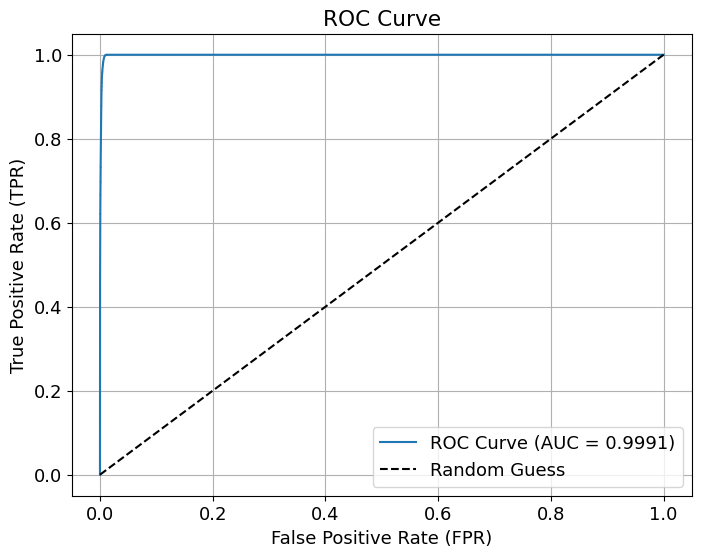

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 예제 데이터 생성
# 정상(0)과 비정상(1) 데이터 분포
# np.random.seed(42)
# normal_data = np.random.normal(0, 1, size=(1000, 2))  # 정상 데이터
# outlier_data = np.random.uniform(-4, 4, size=(50, 2))  # 이상치 데이터

# 데이터 병합 및 레이블 생성
data = np.vstack((normal_data, outlier_data))
labels = np.hstack((np.zeros(len(normal_data)), np.ones(len(outlier_data))))

# Isolation Forest를 사용한 이상치 탐지
model = IsolationForest(random_state=42, contamination=len(outlier_data) / len(data))
model.fit(data)
scores = -model.decision_function(data)  # 음수 점수는 이상치 가능성이 높음

# ROC AUC 계산
roc_auc = roc_auc_score(labels, scores)
print(f"ROC AUC: {roc_auc:.4f}")

# ROC 곡선 그리기
fpr, tpr, thresholds = roc_curve(labels, scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
model.summary()

AttributeError: 'IsolationForest' object has no attribute 'summary'

In [ ]:
normal

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,설비 이상신호
0,75.6648,30.0155,100.000486,100.01548,0
1,75.6706,32.2732,100.000486,100.01548,0
2,75.6776,32.1592,98.853300,99.14600,0
3,75.8656,30.8312,98.791800,99.17675,0
4,73.6468,29.5274,98.791800,99.20750,0
...,...,...,...,...,...
345385,67.5951,24.5822,100.555000,99.31990,0
345386,69.7477,24.6776,100.681000,99.32550,0
345387,69.6538,24.5689,100.681000,99.32550,0
345388,69.6970,24.6643,100.681000,99.32550,0


In [ ]:
data

array([[ 75.6648    ,  30.0155    , 100.00048566, 100.01548031,
          0.        ],
       [ 75.6706    ,  32.2732    , 100.00048566, 100.01548031,
          0.        ],
       [ 75.6776    ,  32.1592    ,  98.8533    ,  99.146     ,
          0.        ],
       ...,
       [ 66.005     ,  25.3121    , 100.35      ,  99.231     ,
          1.        ],
       [ 66.1625    ,  25.3504    , 100.288     ,  99.231     ,
          1.        ],
       [ 66.6214    ,  23.5055    , 100.279     ,  99.2852    ,
          1.        ]])

In [ ]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
x_train_pred = model.predict(X_normal_train)
train_mae_loss = np.mean(np.abs(x_train_pred - X_normal_train), axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


ValueError: X has 4 features, but IsolationForest is expecting 5 features as input.

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest

# IsolationForest 모델 학습
model = IsolationForest(random_state=42)
model.fit(X_normal_train.values)  # numpy array로 변환하여 학습

# 예측
x_train_pred = model.predict(X_normal_train.values)  # numpy array로 변환하여 예측

# MAE 손실 계산
train_mae_loss = np.mean(np.abs(x_train_pred - X_normal_train.values), axis=1)

# 결과 출력
print("MAE Loss for Training Data:", train_mae_loss)


ValueError: operands could not be broadcast together with shapes (232570,) (232570,4) 

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest

# IsolationForest 모델 학습
model = IsolationForest(random_state=42)
model.fit(X_normal_train.values)  # numpy array로 변환하여 학습

# 이상치 점수 계산
train_scores = -model.decision_function(X_normal_train.values)  # 음수 값으로 이상치 점수 반환

# MAE 손실 계산
train_mae_loss = np.mean(np.abs(train_scores))  # 각 샘플별 이상치 점수의 절대값 평균

# 결과 출력
print("MAE Loss for Training Data:", train_mae_loss)


MAE Loss for Training Data: 0.09009533640530615


In [ ]:
threshold = np.max(train_mae_loss)
print("Reconstruction threshold: ", threshold)

Reconstruction threshold:  0.09009533640530615


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# # IsolationForest 모델 학습
# model = IsolationForest(random_state=42, contamination=0.1)  # contamination: 이상치 비율
# model.fit(X_normal_train.values)  # 정상 데이터로 모델 학습

# 정상 테스트 데이터에 대한 이상치 점수 계산
test_normal_scores = -model.decision_function(X_normal_test.values)
# 비정상 테스트 데이터에 대한 이상치 점수 계산
test_abnormal_scores = -model.decision_function(X_abnormal_test.values)

# Threshold 설정 (이상치 점수 기준)
threshold = np.percentile(test_normal_scores, 95)  # 상위 5%를 이상치로 간주

# 정상/비정상 데이터 라벨링
y_test_normal = np.zeros(len(test_normal_scores))  # 정상 데이터는 0으로 라벨링
y_test_abnormal = np.ones(len(test_abnormal_scores))  # 비정상 데이터는 1로 라벨링

# 테스트 데이터 예측
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([
    (test_normal_scores > threshold).astype(int),  # 정상 데이터 예측 (Threshold 초과 시 1)
    (test_abnormal_scores > threshold).astype(int)  # 비정상 데이터 예측
])

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산 및 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# # 혼동행렬 시각화
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["정상", "비정상"])
# disp.plot(cmap="Blues")
# plt.show()


Precision (정밀도): 0.7140070006312045
Recall (재현율): 0.9464516619761162
F1 Score: 0.8139595734938183

Classification Report:
              precision    recall  f1-score   support

          정상       0.99      0.95      0.97     99673
         비정상       0.71      0.95      0.81     13147

    accuracy                           0.95    112820
   macro avg       0.85      0.95      0.89    112820
weighted avg       0.96      0.95      0.95    112820


Confusion Matrix:
[[94689  4984]
 [  704 12443]]


결과 해석
주요 메트릭
Precision (정밀도): 0.714 (~71.4%)

모델이 비정상 데이터로 예측한 샘플 중 약 71.4%가 실제 비정상임을 의미합니다.
비정상 데이터를 탐지하는 정확도가 중간 수준임을 나타냅니다.
Recall (재현율): 0.946 (~94.6%)

실제 비정상 데이터 중 94.6%를 모델이 올바르게 탐지했음을 의미합니다.
비정상 데이터를 놓치는 경우(False Negative)가 거의 없습니다.
F1 Score: 0.814 (~81.4%)

Precision과 Recall의 조화 평균으로, 모델이 비정상 데이터 탐지에 대해 균형 잡힌 성능을 가지고 있음을 나타냅니다.
Classification Report
클래스	Precision	Recall	F1-Score	Support
정상	0.99	0.95	0.97	99673
비정상	0.71	0.95	0.81	13147
정상 데이터:

Precision: 0.99 → 모델이 정상으로 예측한 데이터의 99%는 실제 정상입니다.
Recall: 0.95 → 실제 정상 데이터의 95%를 정확히 탐지했습니다.
F1-Score: 0.97 → 매우 높은 성능을 보여줍니다.
비정상 데이터:

Precision: 0.71 → 모델이 비정상으로 예측한 데이터 중 약 71%가 실제 비정상입니다.
Recall: 0.95 → 실제 비정상 데이터 중 약 95%를 정확히 탐지했습니다.
F1-Score: 0.81 → 비정상 데이터 탐지에 대해 균형 잡힌 성능을 보여줍니다.
전체 데이터:

Accuracy: 약 95%로, 전체적인 성능이 매우 높습니다.
Macro Avg:
클래스 간의 균형 잡힌 평균 성능을 나타내며, F1-Score는 0.89입니다.
Weighted Avg:
각 클래스의 샘플 수에 가중치를 부여한 평균 성능으로, F1-Score는 0.95입니다.
Confusion Matrix
예측: 정상 (0)	예측: 비정상 (1)
실제: 정상	94689 (TN)	4984 (FP)
실제: 비정상	704 (FN)	12443 (TP)
True Negative (TN): 94689

실제 정상 데이터를 정상으로 올바르게 예측한 경우.
대다수의 정상 데이터를 정확히 탐지했습니다.
False Positive (FP): 4984

실제 정상 데이터를 비정상으로 잘못 예측한 경우.
약 5%의 정상 데이터가 비정상으로 잘못 분류되었습니다.
False Negative (FN): 704

실제 비정상 데이터를 정상으로 잘못 예측한 경우.
비정상 데이터를 놓치는 경우가 매우 적습니다.
True Positive (TP): 12443

실제 비정상 데이터를 비정상으로 올바르게 예측한 경우.
대부분의 비정상 데이터를 정확히 탐지했습니다.
유의미한 결론
비정상 데이터 탐지 성능:

Recall이 높아 비정상 데이터를 잘 탐지합니다.
그러나 Precision이 약간 낮아 정상 데이터를 비정상으로 잘못 분류(False Positive)하는 경향이 있습니다.
정상 데이터 탐지 성능:

Precision이 매우 높아 정상 데이터를 잘 예측합니다.
하지만 Recall이 95%이므로 일부 정상 데이터를 놓치는 경우가 발생합니다.
혼동행렬 분석:

FP(4984)가 FN(704)보다 크므로, 정상 데이터를 비정상으로 잘못 분류하는 비율이 상대적으로 더 높습니다.
개선 방안
Threshold 조정:

현재 Threshold는 정상 데이터의 상위 5%를 이상치로 간주합니다. Threshold를 조정하여 FP를 줄이고 Precision을 개선할 수 있습니다.
Precision-Recall 균형 최적화:

Precision과 Recall의 균형을 맞추기 위해 모델의 하이퍼파라미터(예: contamination)를 튜닝합니다.
비정상 데이터 집중 탐지:

Precision을 높이기 위해, 비정상 데이터를 더 구체적으로 학습하는 추가 모델을 도입할 수 있습니다.
결론
장점: 비정상 데이터 탐지 성능(Recall)에서 매우 높은 수준을 달성했습니다.
단점: 정상 데이터를 비정상으로 잘못 분류(FP)가 약간 많습니다.
활용 가능성: 비정상 데이터 탐지가 중요한 상황(예: 이상치 탐지, 결함 감지)에서 유의미한 성능을 보여줍니다. Precision을 개선하면 더 실용적일 것입니

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.tree import export_text, export_graphviz
import graphviz
import numpy as np

# 데이터 생성 (예제 데이터)
# np.random.seed(42)
# data = np.random.normal(size=(100, 5))  # 데이터 100개, feature 5개

# Isolation Forest 모델 학습
# model = IsolationForest(n_estimators=3, random_state=42)
# model.fit(data)

# 첫 번째 트리 추출
tree = model.estimators_[0]  # 첫 번째 트리 선택

# feature_names 생성 (데이터 feature 수에 맞게 설정)
feature_names = [f"feature_{i}" for i in range(data2.shape[1])]  # feature 수 5개로 설정

# 트리 구조 출력 (텍스트 형식)
tree_structure = export_text(tree, feature_names=feature_names)
print("Tree Structure (Text Format):")
print(tree_structure)

# 트리 구조 시각화 (Graphviz 형식)
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Graphviz 그래프 출력
graph = graphviz.Source(dot_data)
graph.view("IsolationForest_Tree")  # PDF 파일로 저장 및 자동 열기


Tree Structure (Text Format):
|--- feature_1 <= 0.50
|   |--- feature_3 <= 0.81
|   |   |--- feature_1 <= 0.28
|   |   |   |--- value: [0.82]
|   |   |--- feature_1 >  0.28
|   |   |   |--- feature_1 <= 0.40
|   |   |   |   |--- feature_3 <= 0.60
|   |   |   |   |   |--- feature_1 <= 0.38
|   |   |   |   |   |   |--- feature_1 <= 0.37
|   |   |   |   |   |   |   |--- value: [0.82]
|   |   |   |   |   |   |--- feature_1 >  0.37
|   |   |   |   |   |   |   |--- value: [0.37]
|   |   |   |   |   |--- feature_1 >  0.38
|   |   |   |   |   |   |--- feature_3 <= 0.51
|   |   |   |   |   |   |   |--- value: [0.56]
|   |   |   |   |   |   |--- feature_3 >  0.51
|   |   |   |   |   |   |   |--- value: [0.15]
|   |   |   |   |--- feature_3 >  0.60
|   |   |   |   |   |--- feature_2 <= 0.73
|   |   |   |   |   |   |--- value: [0.69]
|   |   |   |   |   |--- feature_2 >  0.73
|   |   |   |   |   |   |--- feature_0 <= 0.12
|   |   |   |   |   |   |   |--- value: [0.25]
|   |   |   |   |   |   |--- 

'IsolationForest_Tree.pdf'

In [ ]:
data.shape[1]

5

In [ ]:
print("Isolation Forest 학습 feature 수:", model.estimators_[0].tree_.n_features)

Isolation Forest 학습 feature 수: 4


In [ ]:
data

array([[ 75.6648    ,  30.0155    , 100.00048566, 100.01548031,
          0.        ],
       [ 75.6706    ,  32.2732    , 100.00048566, 100.01548031,
          0.        ],
       [ 75.6776    ,  32.1592    ,  98.8533    ,  99.146     ,
          0.        ],
       ...,
       [ 66.005     ,  25.3121    , 100.35      ,  99.231     ,
          1.        ],
       [ 66.1625    ,  25.3504    , 100.288     ,  99.231     ,
          1.        ],
       [ 66.6214    ,  23.5055    , 100.279     ,  99.2852    ,
          1.        ]])

In [ ]:
X_normal_train

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone
332868,0.390655,0.615832,0.630446,0.590214
263198,0.649339,0.584267,0.636771,0.560062
89520,0.217838,0.470603,0.657479,0.594092
167941,0.254653,0.467225,0.720442,0.656788
284280,0.658999,0.623263,0.681825,0.525224
...,...,...,...,...
124627,0.379085,0.480906,0.740870,0.699447
77488,0.463330,0.574288,0.573024,0.581165
324328,0.323891,0.514773,0.666713,0.607989
278344,0.465763,0.673586,0.699174,0.529490


In [ ]:
X_normal_train.values

array([[0.39065536, 0.61583219, 0.63044634, 0.59021426],
       [0.64933918, 0.58426739, 0.63677067, 0.56006205],
       [0.21783816, 0.47060278, 0.65747866, 0.59409236],
       ...,
       [0.32389074, 0.5147726 , 0.66671331, 0.60798888],
       [0.46576255, 0.6735855 , 0.69917448, 0.52948971],
       [0.9834594 , 0.50758217, 0.41301245, 0.49087031]])

In [ ]:
data2 = X_normal_train.values

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.tree import export_text, export_graphviz
import graphviz
import numpy as np

# 데이터 생성 (feature 수 4로 설정)
# np.random.seed(42)
# data = np.random.normal(size=(100, 4))  # 데이터 100개, feature 4개

# # Isolation Forest 모델 학습
# model = IsolationForest(n_estimators=3, random_state=42)
# model.fit(data)

# 두 번째 트리 추출
tree = model.estimators_[1]  # 두 번째 트리 선택

# feature_names 생성 (데이터 feature 수에 맞게 설정)
feature_names = [f"feature_{i}" for i in range(data2.shape[1])]

# 트리 구조 출력 (텍스트 형식)
tree_structure = export_text(tree, feature_names=feature_names)
print("Second Tree Structure (Text Format):")
print(tree_structure)

# 트리 구조 시각화 (Graphviz 형식)
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Graphviz 그래프 출력
graph = graphviz.Source(dot_data)
graph.view("IsolationForest_Second_Tree")  # PDF 파일로 저장 및 자동 열기


Second Tree Structure (Text Format):
|--- feature_2 <= 0.54
|   |--- feature_2 <= 0.33
|   |   |--- feature_3 <= 0.29
|   |   |   |--- feature_0 <= 0.80
|   |   |   |   |--- value: [0.43]
|   |   |   |--- feature_0 >  0.80
|   |   |   |   |--- feature_1 <= 0.68
|   |   |   |   |   |--- value: [0.12]
|   |   |   |   |--- feature_1 >  0.68
|   |   |   |   |   |--- value: [0.11]
|   |   |--- feature_3 >  0.29
|   |   |   |--- feature_2 <= 0.24
|   |   |   |   |--- value: [0.20]
|   |   |   |--- feature_2 >  0.24
|   |   |   |   |--- feature_2 <= 0.25
|   |   |   |   |   |--- value: [0.08]
|   |   |   |   |--- feature_2 >  0.25
|   |   |   |   |   |--- value: [0.42]
|   |--- feature_2 >  0.33
|   |   |--- feature_3 <= 0.23
|   |   |   |--- value: [0.38]
|   |   |--- feature_3 >  0.23
|   |   |   |--- feature_3 <= 0.47
|   |   |   |   |--- feature_3 <= 0.38
|   |   |   |   |   |--- feature_2 <= 0.43
|   |   |   |   |   |   |--- value: [0.59]
|   |   |   |   |   |--- feature_2 >  0.43
|   | 

'IsolationForest_Second_Tree.pdf'

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.tree import export_text, export_graphviz
import graphviz
import numpy as np

# 데이터 생성 (feature 수 4로 설정)
# np.random.seed(42)
# data = np.random.normal(size=(100, 4))  # 데이터 100개, feature 4개

# # Isolation Forest 모델 학습
# model = IsolationForest(n_estimators=3, random_state=42)
# model.fit(data)

# 두 번째 트리 추출
tree = model.estimators_[2]  # 두 번째 트리 선택

# feature_names 생성 (데이터 feature 수에 맞게 설정)
feature_names = [f"feature_{i}" for i in range(data2.shape[1])]

# 트리 구조 출력 (텍스트 형식)
tree_structure = export_text(tree, feature_names=feature_names)
print("Second Tree Structure (Text Format):")
print(tree_structure)

# 트리 구조 시각화 (Graphviz 형식)
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Graphviz 그래프 출력
graph = graphviz.Source(dot_data)
graph.view("/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/IsolationForest_3_Tree")  # PDF 파일로 저장 및 자동 열기


Second Tree Structure (Text Format):
|--- feature_2 <= 0.69
|   |--- feature_0 <= 0.18
|   |   |--- value: [0.54]
|   |--- feature_0 >  0.18
|   |   |--- feature_3 <= 0.27
|   |   |   |--- feature_0 <= 0.55
|   |   |   |   |--- value: [0.37]
|   |   |   |--- feature_0 >  0.55
|   |   |   |   |--- value: [0.94]
|   |   |--- feature_3 >  0.27
|   |   |   |--- feature_1 <= 0.61
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_0 <= 0.60
|   |   |   |   |   |   |--- feature_3 <= 0.65
|   |   |   |   |   |   |   |--- value: [0.21]
|   |   |   |   |   |   |--- feature_3 >  0.65
|   |   |   |   |   |   |   |--- feature_2 <= 0.45
|   |   |   |   |   |   |   |   |--- value: [0.28]
|   |   |   |   |   |   |   |--- feature_2 >  0.45
|   |   |   |   |   |   |   |   |--- value: [0.91]
|   |   |   |   |   |--- feature_0 >  0.60
|   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |--- value: [0.66]
|   |   |   |   |   |   |--- feature_1 >  0.50
|   |   |  

'/content/drive/MyDrive/deeplearning/kamp/impix/01/data/iqr/IsolationForest_3_Tree.pdf'

In [ ]:
print(f"Number of Trees: {len(model.estimators_)}")


Number of Trees: 100


In [ ]:
for i, tree in enumerate(model.estimators_):
    print(f"Tree {i}:")
    print(tree)


Tree 0:
ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1952926171)
Tree 1:
ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1761383086)
Tree 2:
ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1449071958)
Tree 3:
ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1910541088)
Tree 4:
ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1341730541)
Tree 5:
ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1286572245)
Tree 6:
ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1005142668)
Tree 7:
ExtraTreeRegressor(max_depth=8, max_features=1, random_state=502852014)
Tree 8:
ExtraTreeRegressor(max_depth=8, max_features=1, random_state=186414760)
Tree 9:
ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1956263048)
Tree 10:
ExtraTreeRegressor(max_depth=8, max_features=1, random_state=15592051)
Tree 11:
ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1628376228)
Tree 12:
ExtraTreeRegressor(ma

isolation forest모델 종료

LOF 모델

In [ ]:
normal_data

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,설비 이상신호
0,75.6648,30.0155,100.000486,100.01548,0
1,75.6706,32.2732,100.000486,100.01548,0
2,75.6776,32.1592,98.853300,99.14600,0
3,75.8656,30.8312,98.791800,99.17675,0
4,73.6468,29.5274,98.791800,99.20750,0
...,...,...,...,...,...
345385,67.5951,24.5822,100.555000,99.31990,0
345386,69.7477,24.6776,100.681000,99.32550,0
345387,69.6538,24.5689,100.681000,99.32550,0
345388,69.6970,24.6643,100.681000,99.32550,0


In [ ]:
outlier_data

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,설비 이상신호
32768,64.5710,25.99060,100.341,99.2852,1
303489,66.6971,20.84045,100.782,100.3540,1
32772,65.6612,26.53840,100.399,99.2180,1
32773,65.9470,26.44310,100.399,99.2180,1
32774,66.0677,24.03020,100.402,99.2852,1
...,...,...,...,...,...
32763,65.4606,25.22310,100.341,99.2236,1
32764,65.6858,25.26990,100.288,99.2310,1
32765,66.0050,25.31210,100.350,99.2310,1
32766,66.1625,25.35040,100.288,99.2310,1


Predicted Labels: [ 1 -1  1 ...  1  1  1]
Outlier Scores: [1.05439075 1.64283377 1.00440594 ... 0.98959655 0.98787694 1.05127798]


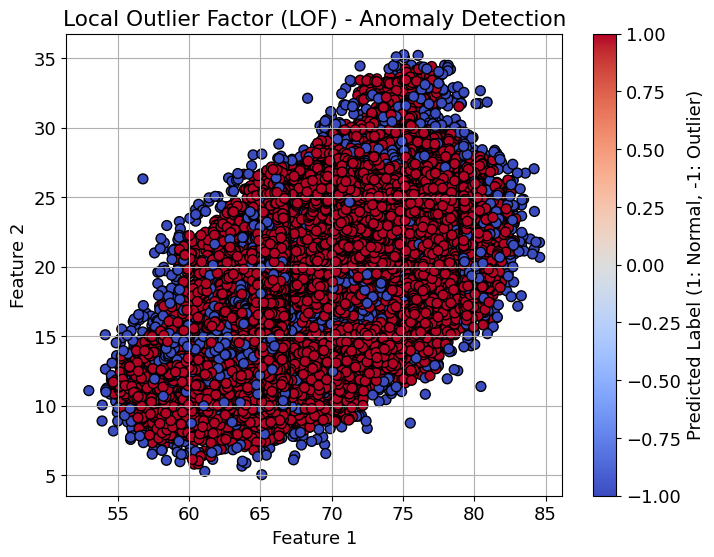

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# 데이터 생성 (예제 데이터)
# np.random.seed(42)
# normal_data = np.random.normal(loc=0, scale=1, size=(200, 2))  # 정상 데이터
# outlier_data = np.random.uniform(low=-4, high=4, size=(20, 2))  # 이상치 데이터

# 데이터 병합
data = np.vstack((normal_data, outlier_data))
labels = np.hstack((np.zeros(len(normal_data)), np.ones(len(outlier_data))))  # 실제 레이블

# LOF 모델 생성 및 학습
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # contamination: 예상 이상치 비율
predicted = lof_model.fit_predict(data)  # 예측 (1: 정상, -1: 이상치)
scores = -lof_model.negative_outlier_factor_  # 이상치 점수

# 결과 출력
print("Predicted Labels:", predicted)
print("Outlier Scores:", scores)

# 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=predicted, cmap='coolwarm', edgecolor='k', s=50)
plt.title("Local Outlier Factor (LOF) - Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Predicted Label (1: Normal, -1: Outlier)")
plt.grid()
plt.show()


In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest

# IsolationForest 모델 학습
# model = IsolationForest(random_state=42)
# model.fit(X_normal_train.values)  # numpy array로 변환하여 학습

# 이상치 점수 계산
train_scores = -lof_model.decision_function(X_normal_train.values)  # 음수 값으로 이상치 점수 반환

# MAE 손실 계산
train_mae_loss = np.mean(np.abs(train_scores))  # 각 샘플별 이상치 점수의 절대값 평균

# 결과 출력
print("MAE Loss for Training Data:", train_mae_loss)


AttributeError: This 'LocalOutlierFactor' has no attribute 'decision_function'

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# LOF 모델 생성 및 학습
# lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# y_pred = lof.fit_predict(X)  # 이상치 탐지

# 이상치 점수 확인
outlier_scores = -lof.negative_outlier_factor_
print(outlier_scores)


In [ ]:
data

array([[ 75.6648    ,  30.0155    , 100.00048566, 100.01548031,
          0.        ],
       [ 75.6706    ,  32.2732    , 100.00048566, 100.01548031,
          0.        ],
       [ 75.6776    ,  32.1592    ,  98.8533    ,  99.146     ,
          0.        ],
       ...,
       [ 66.005     ,  25.3121    , 100.35      ,  99.231     ,
          1.        ],
       [ 66.1625    ,  25.3504    , 100.288     ,  99.231     ,
          1.        ],
       [ 66.6214    ,  23.5055    , 100.279     ,  99.2852    ,
          1.        ]])

In [ ]:
lof_model

LocalOutlierFactor(contamination=0.1)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

# # 데이터 생성
# data = [[-1.1], [0.2], [0.3], [101.1], [0.1]]  # 예시 데이터
# df = pd.DataFrame(data, columns=["Feature"])

# LOF 모델 학습
# lof_model = LocalOutlierFactor(n_neighbors=2, contamination=0.1)
# y_pred = lof_model.fit_predict(df)  # 이상치 탐지

# 이상치 점수 추출
outlier_scores = -lof_model.negative_outlier_factor_  # 속성으로 접근
print("이상치 점수:", outlier_scores)


이상치 점수: [1.05439075 1.64283377 1.00440594 ... 0.98959655 0.98787694 1.05127798]


In [ ]:
df_100-v1

NameError: name 'df_100' is not defined

In [ ]:
df

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone
0,75.6648,30.0155,100.000486,100.01548
1,75.6706,32.2732,100.000486,100.01548
2,75.6776,32.1592,98.853300,99.14600
3,75.8656,30.8312,98.791800,99.17675
4,73.6468,29.5274,98.791800,99.20750
...,...,...,...,...
345385,67.5951,24.5822,100.555000,99.31990
345386,69.7477,24.6776,100.681000,99.32550
345387,69.6538,24.5689,100.681000,99.32550
345388,69.6970,24.6643,100.681000,99.32550


In [ ]:
X_normal_train

,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone
332868,0.390655,0.615832,0.630446,0.590214
263198,0.649339,0.584267,0.636771,0.560062
89520,0.217838,0.470603,0.657479,0.594092
167941,0.254653,0.467225,0.720442,0.656788
284280,0.658999,0.623263,0.681825,0.525224
...,...,...,...,...
124627,0.379085,0.480906,0.740870,0.699447
77488,0.463330,0.574288,0.573024,0.581165
324328,0.323891,0.514773,0.666713,0.607989
278344,0.465763,0.673586,0.699174,0.529490


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# 데이터 준비 (X_normal_train, X_normal_test, X_abnormal_test는 사용자 데이터에 맞게 제공)
# 예제 데이터를 생성 (사용자 데이터로 교체하세요)
# np.random.seed(42)
# X_normal_train = pd.DataFrame(np.random.normal(0, 1, (100, 2)), columns=["Feature1", "Feature2"])
# X_normal_test = pd.DataFrame(np.random.normal(0, 1, (20, 2)), columns=["Feature1", "Feature2"])
# X_abnormal_test = pd.DataFrame(np.random.uniform(-4, 4, (20, 2)), columns=["Feature1", "Feature2"])

# LOF 모델 학습
lof = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
lof.fit(X_normal_train)  # 정상 데이터로 학습

# 정상 테스트 데이터에 대한 이상치 점수 계산
test_normal_scores = -lof.decision_function(X_normal_test)
# 비정상 테스트 데이터에 대한 이상치 점수 계산
test_abnormal_scores = -lof.decision_function(X_abnormal_test)

# Threshold 설정 (이상치 점수 기준)
threshold = np.percentile(test_normal_scores, 95)  # 상위 5%를 이상치로 간주

# 정상/비정상 데이터 라벨링
y_test_normal = np.zeros(len(test_normal_scores))  # 정상 데이터는 0으로 라벨링
y_test_abnormal = np.ones(len(test_abnormal_scores))  # 비정상 데이터는 1로 라벨링

# 테스트 데이터 예측
y_true = np.concatenate([y_test_normal, y_test_abnormal])  # 실제 라벨 (0 = 정상, 1 = 비정상)
y_pred = np.concatenate([
    (test_normal_scores > threshold).astype(int),  # 정상 데이터 예측 (Threshold 초과 시 1)
    (test_abnormal_scores > threshold).astype(int)  # 비정상 데이터 예측
])

# Precision, Recall, F1 Score 계산
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 결과 출력
print("Precision (정밀도):", precision)
print("Recall (재현율):", recall)
print("F1 Score:", f1)

# 추가적으로 Classification Report 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["정상", "비정상"]))

# 혼동행렬 계산 및 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# # 혼동행렬 시각화
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["정상", "비정상"])
# disp.plot(cmap="Blues")
# plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Precision (정밀도): 0.7195272931907709
Recall (재현율): 0.97254126416673
F1 Score: 0.8271177669243458

Classification Report:
              precision    recall  f1-score   support

          정상       1.00      0.95      0.97     99673
         비정상       0.72      0.97      0.83     13147

    accuracy                           0.95    112820
   macro avg       0.86      0.96      0.90    112820
weighted avg       0.96      0.95      0.96    112820


Confusion Matrix:
[[94689  4984]
 [  361 12786]]
